![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Import data**

In [0]:
link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
df = pd.read_csv(link , encoding = 'latin1')

In [0]:
# Print out First 5 rows from dataframe
# Your code here
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [0]:
# Print out brief info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [0]:
# Your code here
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [0]:
# List all NaN values
df[df['CustomerID'].isna() | df['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/10 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/10 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/10 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/10 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/10 14:32,0.43,NaN,United Kingdom


In [0]:
df.dropna(subset=['CustomerID'], inplace=True)

**Exclude negative Quatity entries**

In [0]:
df = df[df['Quantity'] >=0 ]

**Exclude negative Price entries**

In [0]:
df = df[df['UnitPrice'] >=0 ]

### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [0]:
# Your code here
firstCustomerId = df[df['Country'] =='United Kingdom'].groupby('CustomerID').count().sort_values(by=['InvoiceNo'], ascending=False).head(1).index[0]
print('The customerID with the highest number of orders comes from the United Kingdom: ', firstCustomerId)



The customerID with the highest number of orders comes from the United Kingdom:  17841.0


**The customer with the highest money spent on purchases comes from Netherlands**

In [0]:
# Your code here
df['TotalSpent'] = df['Quantity'] * df['UnitPrice']
highestMoneySpentCustomer = df[df['Country'] =='Netherlands'].groupby('CustomerID').sum().sort_values(by=['TotalSpent'], ascending=False).head(1)
highestMoneySpentCustomer

,Quantity,UnitPrice,TotalSpent
CustomerID,,,
14646.0,197491,5176.09,280206.02


**On which year had the highest sales?**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      397924 non-null object
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null object
UnitPrice      397924 non-null float64
CustomerID     397924 non-null float64
Country        397924 non-null object
TotalSpent     397924 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 30.4+ MB


In [0]:
df['Date'] = df['InvoiceDate'].str.split().str[0]
df['Time'] = df['InvoiceDate'].str.split().str[1]
df['Year'] = df['Date'].str[-2:]
df.groupby('Year').sum()['TotalSpent']

Year
10    5.727139e+05
11    8.338694e+06
Name: TotalSpent, dtype: float64

In [0]:
# Your code here

**How many orders (per hour)?**

In [0]:
df['Hour'] = df['Time'].str.split(':').str[0]
df['Hour'].unique()
orderPerHour = df.groupby('Hour').count()['InvoiceNo']

**Make a plot about number of orders per hour**

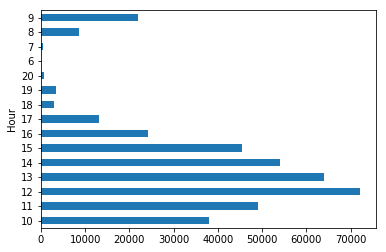

In [0]:
orderPerHour.plot(kind='barh')

**How many orders (per month)?**

In [0]:
df['Date'].unique()

array(['12/1/10', '12/2/10', '12/3/10', '12/5/10', '12/6/10', '12/7/10',
       '12/8/10', '12/9/10', '12/10/10', '12/12/10', '12/13/10',
       '12/14/10', '12/15/10', '12/16/10', '12/17/10', '12/19/10',
       '12/20/10', '12/21/10', '12/22/10', '12/23/10', '1/4/11', '1/5/11',
       '1/6/11', '1/7/11', '1/9/11', '1/10/11', '1/11/11', '1/12/11',
       '1/13/11', '1/14/11', '1/16/11', '1/17/11', '1/18/11', '1/19/11',
       '1/20/11', '1/21/11', '1/23/11', '1/24/11', '1/25/11', '1/26/11',
       '1/27/11', '1/28/11', '1/30/11', '1/31/11', '2/1/11', '2/2/11',
       '2/3/11', '2/4/11', '2/6/11', '2/7/11', '2/8/11', '2/9/11',
       '2/10/11', '2/11/11', '2/13/11', '2/14/11', '2/15/11', '2/16/11',
       '2/17/11', '2/18/11', '2/20/11', '2/21/11', '2/22/11', '2/23/11',
       '2/24/11', '2/25/11', '2/27/11', '2/28/11', '3/1/11', '3/2/11',
       '3/3/11', '3/4/11', '3/6/11', '3/7/11', '3/8/11', '3/9/11',
       '3/10/11', '3/11/11', '3/13/11', '3/14/11', '3/15/11', '3/16/11',
       '3

In [0]:

df['Month'] = df['Date'].str.split('/').str[0]
orderPerMonth = df.groupby('Month').count()['InvoiceNo']
orderPerMonth

Month
1     21232
10    49557
11    64545
12    43464
2     19928
3     27177
4     22644
5     28322
6     27185
7     26827
8     27013
9     40030
Name: InvoiceNo, dtype: int64

**Make a plot about number of orders per month**

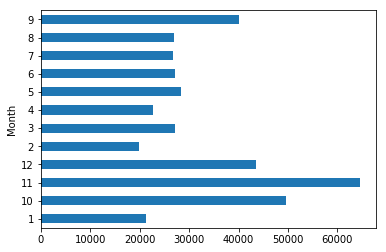

In [0]:
orderPerMonth.plot(kind='barh')

**Top 10 items most sales**

In [0]:
df.groupby('StockCode').sum().sort_values(by='Quantity' , ascending=False).head(10)

,Quantity,UnitPrice,CustomerID,TotalSpent
StockCode,,,,
23843,80995,2.08,16446.0,168469.60
23166,77916,241.62,3047321.0,81416.73
84077,54415,138.40,7226036.0,13586.25
22197,49183,896.36,16490386.0,37226.43
85099B,46181,3261.69,24748363.0,85220.78
85123A,36782,5887.47,31667793.0,100603.50
84879,35362,2366.56,21450268.0,56580.34
21212,33693,585.49,16135698.0,16394.53
23084,27202,1695.74,12564016.0,51346.20


**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

In [0]:
# Your code here
top10 = df[df['Country'] !='United Kingdom' ].groupby('Country').sum().sort_values(by='Quantity', ascending=False).head(10)
top10['Country'] = top10.index
top10
# What can you tell about this?

,Quantity,UnitPrice,CustomerID,TotalSpent,Country
Country,,,,,
Netherlands,200937,6247.73,34078953.0,285446.34,Netherlands
EIRE,140525,32179.28,106724723.0,265545.90,EIRE
Germany,119263,33532.14,114372304.0,228867.14,Germany
France,111472,36832.04,105763022.0,209024.05,France
Australia,84209,3612.50,14758528.0,138521.31,Australia
Sweden,36083,1695.79,6637579.0,38378.33,Sweden
Switzerland,30083,6389.27,23324743.0,56443.95,Switzerland
Spain,27951,9504.34,32080275.0,61577.11,Spain
Japan,26016,657.21,4095425.0,37416.37,Japan


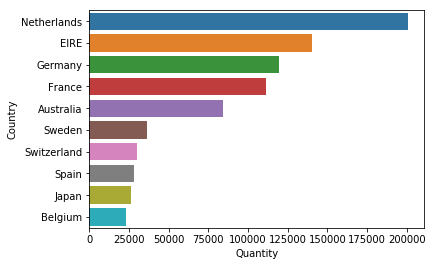

In [0]:
# top10['Quantity'].plot(kind='barh')

sns.barplot(data= top10, x = 'Quantity' , y ='Country')


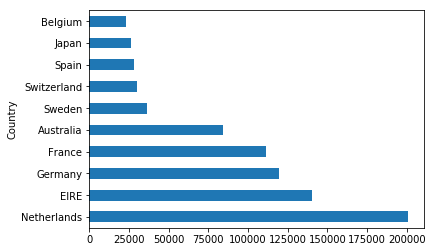

In [0]:
top10['Quantity'].plot(kind='barh')

### You are awesome!!